# *Fake Instagram Detection*

# 1. Introduction

Munculnya sosial media telah memicu menyebarnya berbagai informasi palsu di kalangan masyarakat. Akun palsu dapat menyebarkan berita palsu. AKibat dari berita palsu yang disebarluaskan dapat menyesatkan masyarakat yang mengandalkan sosial media untuk memperoleh informasi, dan berita palsu juga dapat memberikan dampak misinformasi di kalangan pengguna.

Berkembangnya aplikasi Sosial Media juga dapat membuka peluang yang luas bagi orangorang tertentu untuk melakukan penipuan dengan menggunakan akun palsu. Salah satu kecurangan dari adanya akun palsu adalah penyalahgunaan identitas seseorang atau instansi yang nantinya akan digunakan untuk melakukan kejahatan seperti jual beli barang atau berbisnis. Penipuan ini dapat menimbulkan kesalahpahaman antara pengguna dalam jual beli barang dan berbisnis sehingga banyak orang atau pengguna harus berhati-hati dalam melakukan transaksi online.

Akun palsu juga sering ditemukan memberikan komentar spam di sosial media dengan komentar yang dianggap tidak relevan secara kontekstual. Sebagai contoh komentar spam pada halaman Instagram public figure, komentar spam tersebut dapat berupa postingan yang tidak ada kaitannya dengan postingan dan status pada halaman yang bersangkutan, seperti mengirimkan informasi yang tidak diinginkan oleh pengguna. Aktivitas spam memang mengganggu karena dapat menimbulkan informasi yang menyesatkan dan mengganggu alur diskusi dalam status hingga kesulitan mencari informasi. Apalagi komentator spam di sosial media dilakukan oleh akun palsu yang identitasnya tidak diketahui.

Cyberbullying juga merupakan salah satu yang patut mendapat perhatian dari dampak akun palsu sebagai tindakan pelecehan menggunakan teknologi. Aktivitas tersebut biasanya dilakukan dalam bentuk komentar jahat, posting gambar, atau video yang dimaksudkan untuk menyakiti atau mempermalukan orang lain. Hal ini berdampak besar baik bagi masyarakat maupun pengguna sosial media karena dapat menimbulkan kepanikan yang berujung pada kematian. Selain itu, cyberbullying juga dapat menyebabkan penurunan mental bagi pengguna yang menjadi korbannya.

Oleh karena itu, untuk mengatasi masalah di atas, perlu adanya model untuk membangun model klasifikasi akun palsu pada media sosial, dengan sampel salah satu platform media sosial yaitu Instagram.

# 2. Import Libraries

Sebelum memulai mengolah data dengan menggunakan Python diperlukan berbagai pustaka atau *library* yang dapat memudahkan proses. Pustaka yang dibutuhkan harus sesuai dengan data, model, dan metode yang digunakan dalam analisis. Pustaka yang dibutuhkan pada analisis ini adalah sebagai berikut:

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

# For Preprocessing
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer, OutlierTrimmer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier

# For Regression Problems
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Evaluate Regression Models
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# For Model Saving
import pickle

# 3. Data Loading

Data loading dilakukan setelah import pustaka selesai. Jika import pustaka berjalan dengan baik, selanjutnya mengimport dataset dengan menggunakan `.read_csv()`.

In [2]:
# Import and Load Data
data = pd.read_csv('fake_detection.csv')
data_ori = data.copy()
data

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,posts,followers,follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
691,1,0.29,1,0.0,0,0,0,0,13,114,811,1
692,1,0.40,1,0.0,0,0,0,0,4,150,164,1
693,1,0.00,2,0.0,0,0,0,0,3,833,3572,1
694,0,0.17,1,0.0,0,0,0,0,1,219,1695,1


Dengan menampilkan data yang sudah diimport, dapat diketahui gambaran umum dari data. Data tersebut memiliki 41.188 baris dan 21 kolom.

Informasi lebih detail mengenai struktur data dapat dilihat menggunakan fungsi `info()`.

In [3]:
# Check Dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           696 non-null    int64  
 1   nums/length username  696 non-null    float64
 2   fullname words        696 non-null    int64  
 3   nums/length fullname  696 non-null    float64
 4   name==username        696 non-null    int64  
 5   description length    696 non-null    int64  
 6   external URL          696 non-null    int64  
 7   private               696 non-null    int64  
 8   posts                 696 non-null    int64  
 9   followers             696 non-null    int64  
 10  follows               696 non-null    int64  
 11  fake                  696 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 65.4 KB


Kolom target y, akan diubah namanya menjadi kolom deposit.

In [4]:
# Rename Column Target (y)

data = data.rename(columns={'y': 'deposit'})

Berikut pengkategorian kolom berdasarkan tipe datanya:

In [5]:
# Get Numerical and Categorical Columns

num_columns = data.select_dtypes(include=np.number).columns.tolist()
cat_columns = data.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns:', num_columns)
print('Categorical Columns:', cat_columns)

Numerical Columns: ['profile pic', 'nums/length username', 'fullname words', 'nums/length fullname', 'name==username', 'description length', 'external URL', 'private', 'posts', 'followers', 'follows', 'fake']
Categorical Columns: []


Informasi statistik untuk setiap kolom seperti nilai minimum, nilai maksimum, standar deviasi, rata-rata dan sebagainya, dapat ditampilkan dengan mengikuti perintah berikut

In [6]:
# Check Descriptive Statistics
data.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,posts,followers,follows,fake
count,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,6.960000e+02,696.000000,696.00000
mean,0.711207,0.166609,1.475575,0.042170,0.035920,23.412356,0.113506,0.369253,103.244253,7.914991e+04,555.086207,0.50000
std,0.453527,0.218964,1.076622,0.143664,0.186223,38.595721,0.317438,0.482950,378.028168,8.428875e+05,1023.613869,0.50036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.200000e+01,61.000000,0.00000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.655000e+02,252.000000,0.50000
75%,1.000000,0.330000,2.000000,0.000000,0.000000,35.000000,0.000000,1.000000,77.000000,6.930000e+02,601.750000,1.00000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.00000


Tidak ada missing value pada data, namun ada beberapa feature dengan value unknown. Karena jumlah value unknown ada pada hampir semua kolom categorical, maka unknown tidak dihapus dan tetap diikut sertakan dalam data pengujian. Dengan asumsi unknown merupakan kategori feature dari nasabah yang tidak termasuk dalam kategori atau label yang ditentukan oleh bank sebelumnya.

In [7]:
# Check Missing Values

data.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
posts                   0
followers               0
follows                 0
fake                    0
dtype: int64

# 4. Data Preprocessing

## Data Inference Selection

Data inference adalah data yang bukan termasuk dalam data training maupun test. Pembagian data inference ini diperlukan untuk mengevaluasi model apakah model dapat memperkirakan label (y) jika ditambahkan data baru. Data inference yang akan ditentukan adalah 5 data, diambil secara random dari data, dengan random_state yang ditetapkan = 42.

In [8]:
# Get Data for Model Inference

data_inf = data.sample(5, random_state=42)
data_inf

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,posts,followers,follows,fake
674,0,0.31,1,0.33,0,0,0,0,0,42,175,1
314,1,0.88,1,0.00,0,0,0,1,39,8,60,1
611,1,0.00,2,0.00,0,14,0,0,13,228,346,0
431,0,0.25,1,0.00,0,0,0,1,0,0,11,1
552,0,0.46,1,0.00,0,0,0,1,0,332,1333,1


## Data Train and Test Selection

Data yang akan diuji adalah dataset tanpa data inference, sehingga index data inference perlu dihapus terlebih dahulu.

In [9]:
# Remove Inference-set from Dataset

data_train_test = data.drop(data_inf.index)
data_train_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,posts,followers,follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
691,1,0.29,1,0.0,0,0,0,0,13,114,811,1
692,1,0.40,1,0.0,0,0,0,0,4,150,164,1
693,1,0.00,2,0.0,0,0,0,0,3,833,3572,1
694,0,0.17,1,0.0,0,0,0,0,1,219,1695,1


Reset_index() digunakan untuk me-reset indeks yang telah ter-set dan menjadikan indeksnya default, yaitu berupa bilangan integer yang dimulai dari 0. Reset_index dilakukan pada data_train_test dan data inference.

In [10]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

Splitting dataset diperlukan untuk membagi dataset menjadi dua bagian, yaitu data training dan data_test dengan proporsi tertentu. Proporsi ukuran yang digunakan untuk splitting data adalah 70% untuk data training dan 30% untuk data test.

In [11]:
# Splitting Dataset

X = data_train_test.drop(['fake'], axis=1)
y = data_train_test['fake']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape)
print(X_test.shape)

(483, 11)
(208, 11)


## Data Distribution

Dalam menganalisis data kita perlu memahami distribusi data pada tiap kolom. Distribusi data akan membantu kita mendeteksi masalah yang mungkin ada seperti adanya outliers atau pencilan yang ekstrim dan deviasi atau penyimpangan yang besar. Skewness dapat menunjukkan kondisi pembagian atau distribusi data. 

*Skewness* memberikan gambaran distribusi data apakah miring ke kiri, kanan atau simetri. 
- Jika kemiringan antara -0,5 dan 0,5, maka data cukup simetris.
- Jika kemiringan antara -1 dan –0,5 atau antara 0,5 dan 1, maka data cukup miring.
- Jika kemiringan kurang dari -1 atau lebih besar dari 1, maka data sangat miring.

Berikut nilai distribusi dari masing-masing feature :

In [12]:
# Check Distributions

X_train_skewness = pd.DataFrame(X_train.skew(axis=0), columns=['skewness_value']).reset_index()
X_train_skewness.rename(columns={'index':'column'}, inplace=True)
X_train_skewness['distribution'] = np.where(
    (X_train_skewness['skewness_value'] < 0.5) & (X_train_skewness['skewness_value'] > -0.5),'normal', 
    'skewed')
X_train_skewness

,column,skewness_value,distribution
0,profile pic,-0.940414,skewed
1,nums/length username,1.237460,skewed
2,fullname words,3.486016,skewed
3,nums/length fullname,4.163297,skewed
4,name==username,4.754187,skewed
5,description length,1.836967,skewed
6,external URL,2.574839,skewed
7,private,0.528323,skewed
8,posts,14.404520,skewed
9,followers,14.316052,skewed


Visualisasi distribusi data dari masing-masing features adalah sebagai berikut :

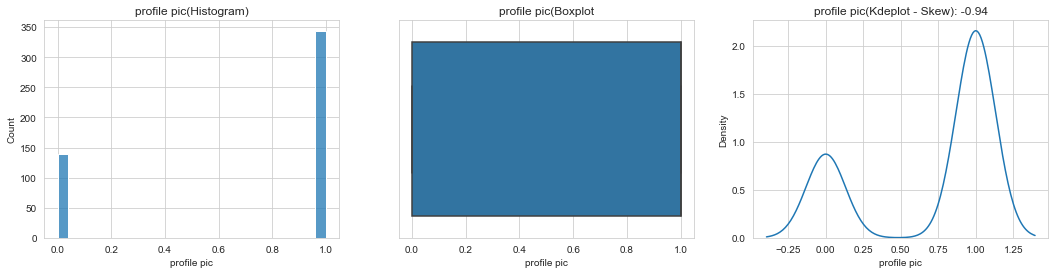

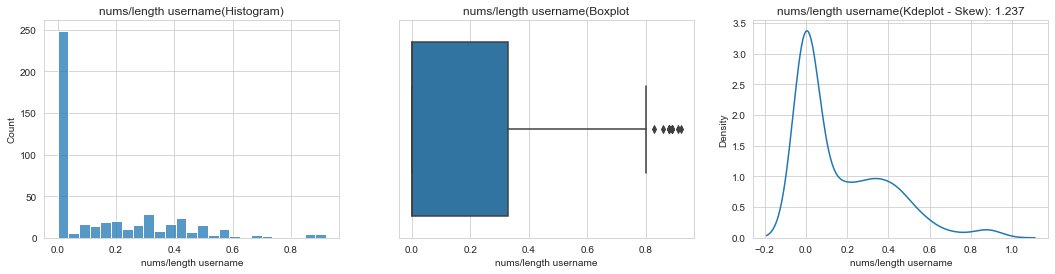

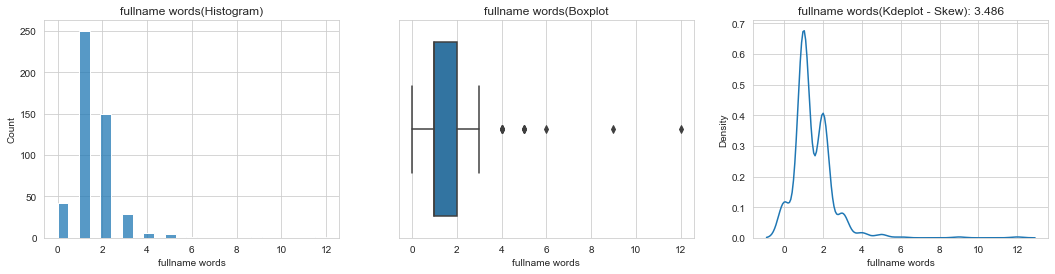

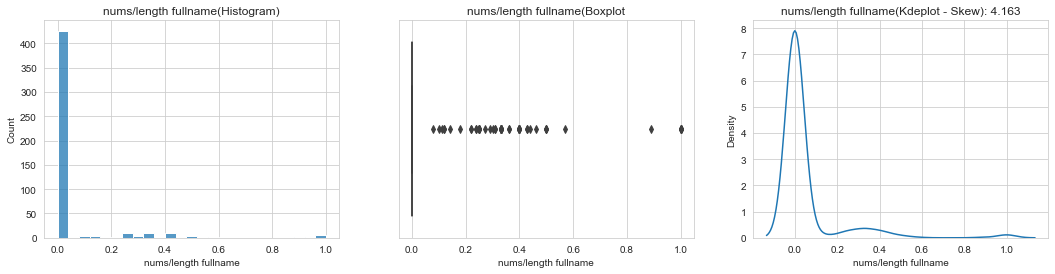

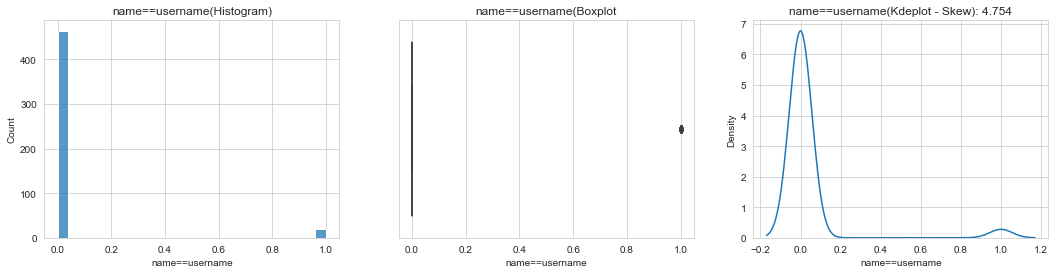

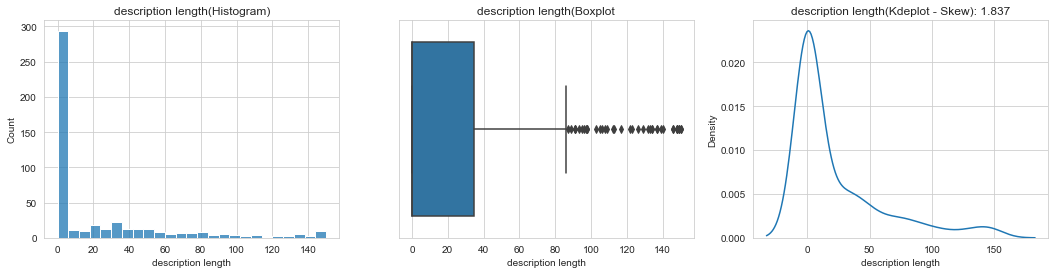

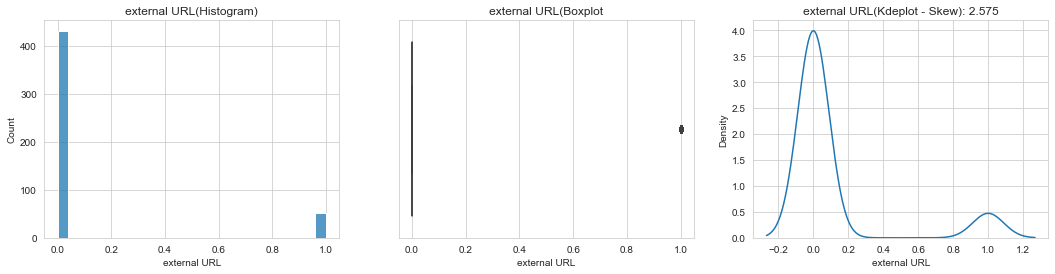

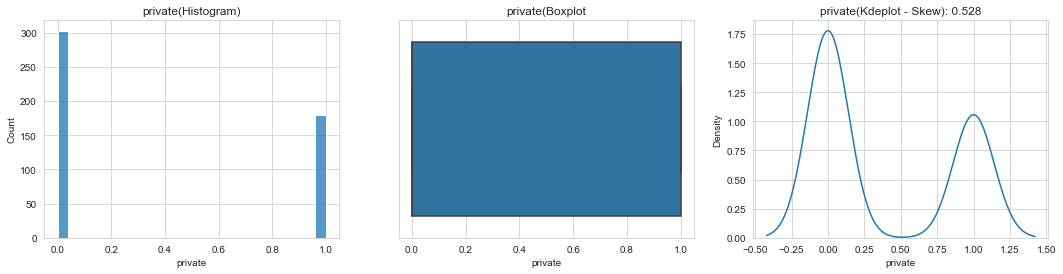

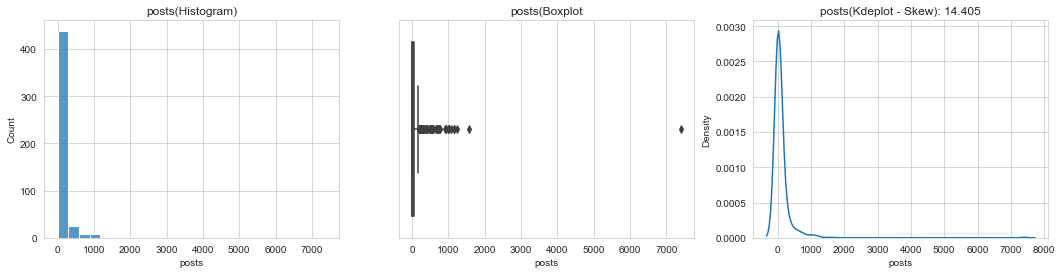

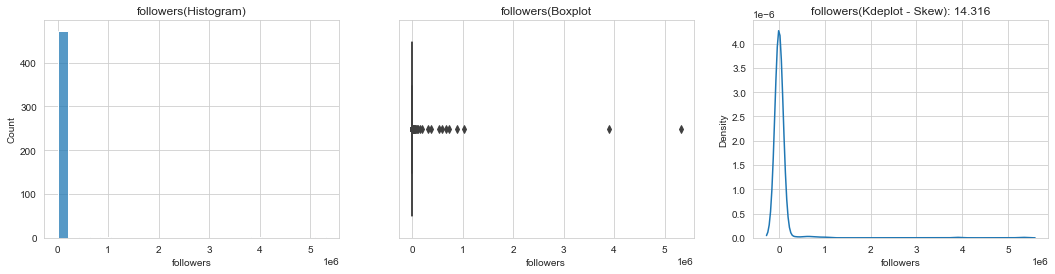

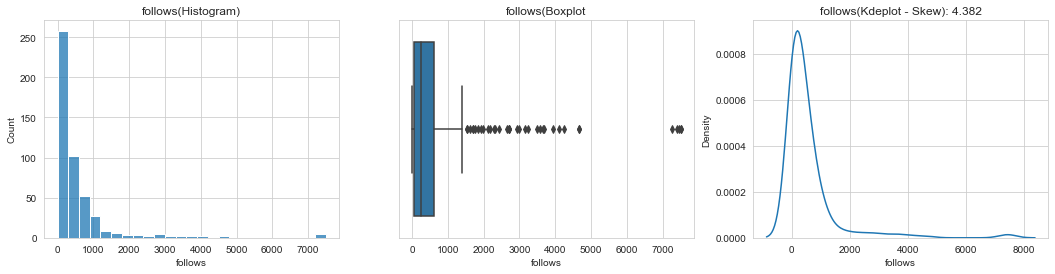

In [13]:
# Visualization of Column Distributions

for col in X_train:
    fig, ax = plt.subplots(1,3, figsize=(18,4))

    sns.histplot(x=X_train[col], ax=ax[0], bins=25)
    sns.boxplot(x=X_train[col], ax=ax[1])
    sns.kdeplot(x=X_train[col], ax=ax[2])
    skew_val = round(X_train[col].skew(),3)

    ax[0].set_title(col + '(Histogram)')
    ax[1].set_title(col + '(Boxplot')
    ax[2].set_title(col + '(Kdeplot - Skew): ' + str(skew_val))
    plt.show()

## Pipeline for Preprocessing

In [14]:
X_train.columns

Index(['profile pic', 'nums/length username', 'fullname words',
       'nums/length fullname', 'name==username', 'description length',
       'external URL', 'private', 'posts', 'followers', 'follows'],
      dtype='object')

In [15]:
# Define num_columns and bin_columns
num_columns = ['nums/length username', 'fullname words', 'nums/length fullname', 'description length', 'posts', 'followers', 'follows']
bin_columns = ['profile pic', 'name==username', 'external URL', 'private']

# Pipeline for numerical columns
numerical_pipeline = Pipeline([('scaler', MinMaxScaler())])

# Pipeline for categorical columns
categorical_pipeline = Pipeline([('encode', OrdinalEncoder())])

# ColumnTransformer for numerical and categorical columns
Preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, num_columns),
    ('categoric', categorical_pipeline, cat_columns)
])

# 5. Model Definition

Model yang akan diuji coba dalam analisis ini adalah sebagai berikut:
1. Logistic Regression
2. SVM
3. Decision Tree
4. Random Forest
5. KNN
6. Naive Bayes
7. Gradient Boosting
8. Neural Network

Berikut pendefinisian model dari masing-masing model tersebut:

In [16]:
# Pipeline for Define Preprocessor and Classifier

logreg_pipeline = Pipeline([
    ('prep', Preprocessor),
    ('clf', LogisticRegression(random_state=0))])

svc_pipeline = Pipeline([
    ('prep', Preprocessor),
    ('clf', SVC(random_state=0))])

dt_pipeline = Pipeline([
    ('prep', Preprocessor),
    ('clf', DecisionTreeClassifier(random_state=0))])

rf_pipeline = Pipeline([
    ('prep', Preprocessor),
    ('clf', RandomForestClassifier(random_state=0))])

knn_pipeline = Pipeline([
    ('prep', Preprocessor),
    ('clf', KNeighborsClassifier())])

nb_pipeline = Pipeline([
    ('prep', Preprocessor),
    ('clf', GaussianNB())])

gb_pipeline = Pipeline([
    ('prep', Preprocessor),
    ('clf', GradientBoostingClassifier(random_state=0))])

nn_pipeline = Pipeline([
    ('prep', Preprocessor),
    ('clf', MLPClassifier(random_state=0))])

# 6. Model Training

Model yang sudah didefinisikan akan di-tuning dengan beberapa parameter menggunakan GridSearchCV untuk mencari best parameter dengan score terbaik yang dapat digunakan untuk membuat model.

In [17]:
# Tuning Hyperparameter with GridSearchCV for Model logistic regression

## Create the parameter grid
logreg_parameters = {
    'clf__solver': ['newton-cg', 'liblinier'],
    'clf__C': [0.01, 0,1, 1, 10],
    'clf__penalty': ['l2', 'none']}

## Initiate the grid search model
grid_logreg = GridSearchCV(estimator = logreg_pipeline, 
                      param_grid = logreg_parameters,
                      n_jobs=-1,
                      verbose=1,
                      cv=3).fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [18]:
# Tuning Hyperparameter with GridSearchCV for Model SVC

## Create the parameter grid
svc_parameters = {
    'clf__C' : [1, 10, 100],
    'clf__gamma' : [ 1, 0.1, 0.01]}

## Initiate the grid search model
grid_svc = GridSearchCV(estimator = svc_pipeline, 
                      param_grid = svc_parameters,
                      n_jobs=-1,
                      verbose=1,
                      cv=3).fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [19]:
# Tuning Hyperparameter with GridSearchCV for Model Decision Tree

## Create the parameter grid
dt_parameters = {
            'clf__max_depth' : [16, 18, 20], 
            'clf__min_samples_leaf' : [5, 50, 100]}

## Initiate the grid search model
grid_dt = GridSearchCV(estimator = dt_pipeline, 
                      param_grid = dt_parameters,
                      n_jobs=-1,
                      verbose=1,
                      cv=3).fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [20]:
# Tuning Hyperparameter with GridSearchCV for Model Random Forest

## Create the parameter grid
rf_parameters = {
            'clf__max_depth' : [16, 18, 20], 
            'clf__min_samples_leaf' : [5, 50, 100],
            'clf__n_estimators' : [200, 400]}

## Initiate the grid search model
grid_rf = GridSearchCV(estimator = rf_pipeline, 
                      param_grid = rf_parameters,
                      n_jobs=-1,
                      verbose=1,
                      cv=3).fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


In [21]:
# Tuning Hyperparameter with GridSearchCV for Model KNN

## Create the parameter grid
knn_parameters = {'clf__n_neighbors': [21, 23, 25]}

## Initiate the grid search model
grid_knn = GridSearchCV(estimator = knn_pipeline, 
                      param_grid = knn_parameters,
                      n_jobs=-1,
                      verbose=1,
                      cv=3).fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


In [22]:
# Tuning Hyperparameter with GridSearchCV for Model Naive Bayes

## Create the parameter grid
nb_parameters = {'clf__var_smoothing': np.logspace(0,-9, num=10)}

## Initiate the grid search model
grid_nb = GridSearchCV(estimator = nb_pipeline, 
                      param_grid = nb_parameters,
                      n_jobs=-1,
                      verbose=1,
                      cv=3).fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [23]:
# Tuning Hyperparameter with GridSearchCV for Model Gradient Boost

## Create the parameter grid
gb_parameters = {
            'clf__learning_rate': [0.1, 0.01, 0.001],
            'clf__n_estimators': [200, 400]}

## Initiate the grid search model
grid_gb = GridSearchCV(estimator = gb_pipeline, 
                      param_grid = gb_parameters,
                      n_jobs=-1,
                      verbose=1,
                      cv=3).fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [24]:
# Tuning Hyperparameter with GridSearchCV for Model Neural Network

## Create the parameter grid
nn_parameters = {
            'clf__alpha': [0.00001, 0.000001],
            'clf__hidden_layer_sizes': [(10, 150, 10), (10, 180, 10)]}

## Initiate the grid search model
grid_nn = GridSearchCV(estimator = nn_pipeline, 
                      param_grid = nn_parameters,
                      n_jobs=-1,
                      verbose=1,
                      cv=3).fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


# 7. Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model.

In [25]:
# Create Evaluation Dataframe
evaluation = pd.DataFrame({'Model': [],
                           'Best Params':[],
                           'Best Cross Val Score':[],
                           'Train Score':[],
                           'Test Score':[]})

# Create Metrics Evaluation Dataframe
metrics_eval = pd.DataFrame({'Model': [],
                             'Train_Precision':[],
                             'Train_Recall':[],
                             'Train_F1-score':[],
                             'Test_Precision':[],
                             'Test_Recall':[],
                             'Test_F1-score':[]})

## Model Logistic Regression

Berikut adalah parameter terbaik, cross_val_score terbaik, train-set score, dan test-set score pada model logistic regression. 

In [26]:
# Evaluate Best Parameter & Accuracy Model
best_params_lr = grid_logreg.best_params_
best_cross_val_lr = grid_logreg.best_score_
score_lr = grid_logreg.score(X_train, y_train)
score_lrt = grid_logreg.score(X_test, y_test)

r = evaluation.shape[0]
evaluation.loc[r] = ['Logistic Regression', best_params_lr, best_cross_val_lr, score_lr, score_lrt]
pd.set_option('display.max_colwidth', None)
evaluation

,Model,Best Params,Best Cross Val Score,Train Score,Test Score
0,Logistic Regression,"{'clf__C': 0.01, 'clf__penalty': 'none', 'clf__solver': 'newton-cg'}",0.89648,0.902692,0.889423


Berikut adalah precision, recall, f1-score pada model logistic regression. 

In [27]:
# Select best model with best fit
best_grid_lr = grid_logreg.best_estimator_

# Calculate precision, recall, f1-score,
prec_lr = precision_score(y_train, best_grid_lr.predict(X_train))
rec_lr = recall_score(y_train, best_grid_lr.predict(X_train))
f1_lr = f1_score(y_train, best_grid_lr.predict(X_train))
prec_lrt = precision_score(y_test, best_grid_lr.predict(X_test))
rec_lrt = recall_score(y_test, best_grid_lr.predict(X_test))
f1_lrt = f1_score(y_test, best_grid_lr.predict(X_test))

r = metrics_eval.shape[0]
metrics_eval.loc[r] = ['Logistic Regression', prec_lr, rec_lr, f1_lr, prec_lrt, rec_lrt, f1_lrt]
pd.set_option('display.max_colwidth', None)
metrics_eval

,Model,Train_Precision,Train_Recall,Train_F1-score,Test_Precision,Test_Recall,Test_F1-score
0,Logistic Regression,0.884615,0.931174,0.907298,0.849057,0.927835,0.8867


Berikut adalah confusion_matrix pada model Logistic Regression:

In [28]:
# Print Confusion Matrix

print('Train-Set')
print(confusion_matrix(y_train, best_grid_lr.predict(X_train)))
print(' ')

print('Test-Set')
print(confusion_matrix(y_test, best_grid_lr.predict(X_test)))

Train-Set
[[206  30]
 [ 17 230]]
 
Test-Set
[[95 16]
 [ 7 90]]


## Model Support Vector Machine (SVM)

Berikut adalah parameter terbaik, cross_val_score terbaik, train-set score, dan test-set score pada model Support Vector Machine (SVM). 

In [29]:
# Evaluate Best Parameter & Accuracy Model
best_params_svc = grid_svc.best_params_
best_cross_val_svc = grid_svc.best_score_
score_svc = grid_svc.score(X_train, y_train)
score_svct = grid_svc.score(X_test, y_test)

evaluation.loc[r+1] = ['Support Vector Machine', best_params_svc, best_cross_val_svc, score_svc, score_svct]
evaluation

,Model,Best Params,Best Cross Val Score,Train Score,Test Score
0,Logistic Regression,"{'clf__C': 0.01, 'clf__penalty': 'none', 'clf__solver': 'newton-cg'}",0.896480,0.902692,0.889423
1,Support Vector Machine,"{'clf__C': 100, 'clf__gamma': 0.1}",0.836439,0.855072,0.860577


Berikut adalah precision, recall, f1-score pada model Support Vector Machine.

In [30]:
# Select best model with best fit
best_grid_svc = grid_svc.best_estimator_

# Calculate precision, recall, f1-score,
prec_svc = precision_score(y_train, best_grid_svc.predict(X_train))
rec_svc = recall_score(y_train, best_grid_svc.predict(X_train))
f1_svc = f1_score(y_train, best_grid_svc.predict(X_train))
prec_svct = precision_score(y_test, best_grid_svc.predict(X_test))
rec_svct = recall_score(y_test, best_grid_svc.predict(X_test))
f1_svct = f1_score(y_test, best_grid_svc.predict(X_test))

metrics_eval.loc[r+1] = ['Support Vector Machine', prec_svc, rec_svc, f1_svc, prec_svct, rec_svct, f1_svct]
metrics_eval

,Model,Train_Precision,Train_Recall,Train_F1-score,Test_Precision,Test_Recall,Test_F1-score
0,Logistic Regression,0.884615,0.931174,0.907298,0.849057,0.927835,0.886700
1,Support Vector Machine,0.858300,0.858300,0.858300,0.814815,0.907216,0.858537


Berikut adalah confusion_matrix pada model Support Vector Machine:

In [31]:
# Print Confusion Matrix

print('Train-Set')
print(confusion_matrix(y_train, best_grid_svc.predict(X_train)))
print(' ')

print('Test-Set')
print(confusion_matrix(y_test, best_grid_svc.predict(X_test)))

Train-Set
[[201  35]
 [ 35 212]]
 
Test-Set
[[91 20]
 [ 9 88]]


## Model Decision Tree

Berikut adalah parameter terbaik, cross_val_score terbaik, train-set score, dan test-set score pada model Decision Tree. 

In [32]:
# Evaluate Best Parameter & Accuracy Model
best_params_dt = grid_dt.best_params_
best_cross_val_dt = grid_dt.best_score_
score_dt = grid_dt.score(X_train, y_train)
score_dtt = grid_dt.score(X_test, y_test)

evaluation.loc[r+2] = ['Decision Tree', best_params_dt, best_cross_val_dt, score_dt, score_dtt]
evaluation

,Model,Best Params,Best Cross Val Score,Train Score,Test Score
0,Logistic Regression,"{'clf__C': 0.01, 'clf__penalty': 'none', 'clf__solver': 'newton-cg'}",0.896480,0.902692,0.889423
1,Support Vector Machine,"{'clf__C': 100, 'clf__gamma': 0.1}",0.836439,0.855072,0.860577
2,Decision Tree,"{'clf__max_depth': 16, 'clf__min_samples_leaf': 50}",0.848861,0.855072,0.836538


Berikut adalah precision, recall, f1-score pada model Decision Tree.

In [33]:
# Select best model with best fit
best_grid_dt = grid_dt.best_estimator_

# Calculate precision, recall, f1-score,
prec_dt = precision_score(y_train, best_grid_dt.predict(X_train))
rec_dt = recall_score(y_train, best_grid_dt.predict(X_train))
f1_dt = f1_score(y_train, best_grid_dt.predict(X_train))
prec_dtt = precision_score(y_test, best_grid_dt.predict(X_test))
rec_dtt = recall_score(y_test, best_grid_dt.predict(X_test))
f1_dtt = f1_score(y_test, best_grid_dt.predict(X_test))

metrics_eval.loc[r+2] = ['Decision Tree', prec_dt, rec_dt, f1_dt, prec_dtt, rec_dtt, f1_dtt]
metrics_eval

,Model,Train_Precision,Train_Recall,Train_F1-score,Test_Precision,Test_Recall,Test_F1-score
0,Logistic Regression,0.884615,0.931174,0.907298,0.849057,0.927835,0.886700
1,Support Vector Machine,0.858300,0.858300,0.858300,0.814815,0.907216,0.858537
2,Decision Tree,0.886463,0.821862,0.852941,0.853933,0.783505,0.817204


Berikut adalah confusion_matrix pada model Decision Tree.

In [34]:
# Print Confusion Matrix

print('Train-Set')
print(confusion_matrix(y_train, best_grid_dt.predict(X_train)))
print(' ')

print('Test-Set')
print(confusion_matrix(y_test, best_grid_dt.predict(X_test)))

Train-Set
[[210  26]
 [ 44 203]]
 
Test-Set
[[98 13]
 [21 76]]


## Model Random Forest

Berikut adalah parameter terbaik, cross_val_score terbaik, train-set score, dan test-set score pada model Random Forest.

In [35]:
# Evaluate Best Parameter & Accuracy Model
best_params_rf = grid_rf.best_params_
best_cross_val_rf = grid_rf.best_score_
score_rf = grid_rf.score(X_train, y_train)
score_rft = grid_rf.score(X_test, y_test)

evaluation.loc[r+3] = ['Random Forest', best_params_rf, best_cross_val_rf, score_rf, score_rft]
evaluation

,Model,Best Params,Best Cross Val Score,Train Score,Test Score
0,Logistic Regression,"{'clf__C': 0.01, 'clf__penalty': 'none', 'clf__solver': 'newton-cg'}",0.896480,0.902692,0.889423
1,Support Vector Machine,"{'clf__C': 100, 'clf__gamma': 0.1}",0.836439,0.855072,0.860577
2,Decision Tree,"{'clf__max_depth': 16, 'clf__min_samples_leaf': 50}",0.848861,0.855072,0.836538
3,Random Forest,"{'clf__max_depth': 16, 'clf__min_samples_leaf': 5, 'clf__n_estimators': 200}",0.906832,0.948240,0.942308


Berikut adalah precision, recall, f1-score pada model Random Forest.

In [36]:
# Select best model with best fit
best_grid_rf = grid_rf.best_estimator_

# Calculate precision, recall, f1-score,
prec_rf = precision_score(y_train, best_grid_rf.predict(X_train))
rec_rf = recall_score(y_train, best_grid_rf.predict(X_train))
f1_rf = f1_score(y_train, best_grid_rf.predict(X_train))
prec_rft = precision_score(y_test, best_grid_rf.predict(X_test))
rec_rft = recall_score(y_test, best_grid_rf.predict(X_test))
f1_rft = f1_score(y_test, best_grid_rf.predict(X_test))

metrics_eval.loc[r+3] = ['Random Forest', prec_rf, rec_rf, f1_rf, prec_rft, rec_rft, f1_rft]
metrics_eval

,Model,Train_Precision,Train_Recall,Train_F1-score,Test_Precision,Test_Recall,Test_F1-score
0,Logistic Regression,0.884615,0.931174,0.907298,0.849057,0.927835,0.886700
1,Support Vector Machine,0.858300,0.858300,0.858300,0.814815,0.907216,0.858537
2,Decision Tree,0.886463,0.821862,0.852941,0.853933,0.783505,0.817204
3,Random Forest,0.954918,0.943320,0.949084,0.938144,0.938144,0.938144


Berikut adalah confusion_matrix pada model Random Forest.

In [37]:
# Print Confusion Matrix

print('Train-Set')
print(confusion_matrix(y_train, best_grid_rf.predict(X_train)))
print(' ')

print('Test-Set')
print(confusion_matrix(y_test, best_grid_rf.predict(X_test)))

Train-Set
[[225  11]
 [ 14 233]]
 
Test-Set
[[105   6]
 [  6  91]]


## Model K-Nearest Neighbors (KNN)

Berikut adalah parameter terbaik, cross_val_score terbaik, train-set score, dan test-set score pada model K-Nearest Neighbors (KNN). 

In [38]:
# Evaluate Best Parameter & Accuracy Model
best_params_knn = grid_knn.best_params_
best_cross_val_knn = grid_knn.best_score_
score_knn = grid_knn.score(X_train, y_train)
score_knnt = grid_knn.score(X_test, y_test)

evaluation.loc[r+4] = ['K-Nearest Neighbors', best_params_knn, best_cross_val_knn, score_knn, score_knnt]
evaluation

,Model,Best Params,Best Cross Val Score,Train Score,Test Score
0,Logistic Regression,"{'clf__C': 0.01, 'clf__penalty': 'none', 'clf__solver': 'newton-cg'}",0.896480,0.902692,0.889423
1,Support Vector Machine,"{'clf__C': 100, 'clf__gamma': 0.1}",0.836439,0.855072,0.860577
2,Decision Tree,"{'clf__max_depth': 16, 'clf__min_samples_leaf': 50}",0.848861,0.855072,0.836538
3,Random Forest,"{'clf__max_depth': 16, 'clf__min_samples_leaf': 5, 'clf__n_estimators': 200}",0.906832,0.948240,0.942308
4,K-Nearest Neighbors,{'clf__n_neighbors': 23},0.830228,0.859213,0.870192


Berikut adalah precision, recall, f1-score pada model K-Nearest Neighbors.

In [39]:
# Select best model with best fit
best_grid_knn = grid_knn.best_estimator_

# Calculate precision, recall, f1-score,
prec_knn = precision_score(y_train, best_grid_knn.predict(X_train))
rec_knn = recall_score(y_train, best_grid_knn.predict(X_train))
f1_knn = f1_score(y_train, best_grid_knn.predict(X_train))
prec_knnt = precision_score(y_test, best_grid_knn.predict(X_test))
rec_knnt = recall_score(y_test, best_grid_knn.predict(X_test))
f1_knnt = f1_score(y_test, best_grid_knn.predict(X_test))

metrics_eval.loc[r+4] = ['K-Nearest Neighbors', prec_knn, rec_knn, f1_knn, prec_knnt, rec_knnt, f1_knnt]
metrics_eval

,Model,Train_Precision,Train_Recall,Train_F1-score,Test_Precision,Test_Recall,Test_F1-score
0,Logistic Regression,0.884615,0.931174,0.907298,0.849057,0.927835,0.886700
1,Support Vector Machine,0.858300,0.858300,0.858300,0.814815,0.907216,0.858537
2,Decision Tree,0.886463,0.821862,0.852941,0.853933,0.783505,0.817204
3,Random Forest,0.954918,0.943320,0.949084,0.938144,0.938144,0.938144
4,K-Nearest Neighbors,0.874477,0.846154,0.860082,0.843137,0.886598,0.864322


Berikut adalah confusion_matrix pada model K-Nearest Neighbors.

In [40]:
# Print Confusion Matrix

print('Train-Set')
print(confusion_matrix(y_train, best_grid_knn.predict(X_train)))
print(' ')

print('Test-Set')
print(confusion_matrix(y_test, best_grid_knn.predict(X_test)))

Train-Set
[[206  30]
 [ 38 209]]
 
Test-Set
[[95 16]
 [11 86]]


## Model Naive Bayes

Berikut adalah parameter terbaik, cross_val_score terbaik, train-set score, dan test-set score pada model Naive Bayes.

In [41]:
# Evaluate Best Parameter & Accuracy Model
best_params_nb = grid_nb.best_params_
best_cross_val_nb = grid_nb.best_score_
score_nb = grid_nb.score(X_train, y_train)
score_nbt = grid_nb.score(X_test, y_test)

evaluation.loc[r+5] = ['Naive Bayes', best_params_nb, best_cross_val_nb, score_nb, score_nbt]
evaluation

,Model,Best Params,Best Cross Val Score,Train Score,Test Score
0,Logistic Regression,"{'clf__C': 0.01, 'clf__penalty': 'none', 'clf__solver': 'newton-cg'}",0.896480,0.902692,0.889423
1,Support Vector Machine,"{'clf__C': 100, 'clf__gamma': 0.1}",0.836439,0.855072,0.860577
2,Decision Tree,"{'clf__max_depth': 16, 'clf__min_samples_leaf': 50}",0.848861,0.855072,0.836538
3,Random Forest,"{'clf__max_depth': 16, 'clf__min_samples_leaf': 5, 'clf__n_estimators': 200}",0.906832,0.948240,0.942308
4,K-Nearest Neighbors,{'clf__n_neighbors': 23},0.830228,0.859213,0.870192
5,Naive Bayes,{'clf__var_smoothing': 1.0},0.799172,0.795031,0.855769


Berikut adalah precision, recall, f1-score pada model Naive Bayes.

In [42]:
# Select best model with best fit
best_grid_nb = grid_nb.best_estimator_

# Calculate precision, recall, f1-score,
prec_nb = precision_score(y_train, best_grid_nb.predict(X_train))
rec_nb = recall_score(y_train, best_grid_nb.predict(X_train))
f1_nb = f1_score(y_train, best_grid_nb.predict(X_train))
prec_nbt = precision_score(y_test, best_grid_nb.predict(X_test))
rec_nbt = recall_score(y_test, best_grid_nb.predict(X_test))
f1_nbt = f1_score(y_test, best_grid_nb.predict(X_test))

metrics_eval.loc[r+5] = ['Naive Bayes', prec_nb, rec_nb, f1_nb, prec_nbt, rec_nbt, f1_nbt]
metrics_eval

,Model,Train_Precision,Train_Recall,Train_F1-score,Test_Precision,Test_Recall,Test_F1-score
0,Logistic Regression,0.884615,0.931174,0.907298,0.849057,0.927835,0.886700
1,Support Vector Machine,0.858300,0.858300,0.858300,0.814815,0.907216,0.858537
2,Decision Tree,0.886463,0.821862,0.852941,0.853933,0.783505,0.817204
3,Random Forest,0.954918,0.943320,0.949084,0.938144,0.938144,0.938144
4,K-Nearest Neighbors,0.874477,0.846154,0.860082,0.843137,0.886598,0.864322
5,Naive Bayes,0.862745,0.712551,0.780488,0.894118,0.783505,0.835165


Berikut adalah confusion_matrix pada model Naive Bayes.

In [43]:
# Print Confusion Matrix

print('Train-Set')
print(confusion_matrix(y_train, best_grid_nb.predict(X_train)))
print(' ')

print('Test-Set')
print(confusion_matrix(y_test, best_grid_nb.predict(X_test)))

Train-Set
[[208  28]
 [ 71 176]]
 
Test-Set
[[102   9]
 [ 21  76]]


## Model Gradient Boosting

Berikut adalah parameter terbaik, cross_val_score terbaik, train-set score, dan test-set score pada model Gradient Boosting.

In [44]:
# Evaluate Best Parameter & Accuracy Model
best_params_gb = grid_gb.best_params_
best_cross_val_gb = grid_gb.best_score_
score_gb = grid_gb.score(X_train, y_train)
score_gbt = grid_gb.score(X_test, y_test)

evaluation.loc[r+6] = ['Gradient Boosting', best_params_gb, best_cross_val_gb, score_gb, score_gbt]
evaluation

,Model,Best Params,Best Cross Val Score,Train Score,Test Score
0,Logistic Regression,"{'clf__C': 0.01, 'clf__penalty': 'none', 'clf__solver': 'newton-cg'}",0.896480,0.902692,0.889423
1,Support Vector Machine,"{'clf__C': 100, 'clf__gamma': 0.1}",0.836439,0.855072,0.860577
2,Decision Tree,"{'clf__max_depth': 16, 'clf__min_samples_leaf': 50}",0.848861,0.855072,0.836538
3,Random Forest,"{'clf__max_depth': 16, 'clf__min_samples_leaf': 5, 'clf__n_estimators': 200}",0.906832,0.948240,0.942308
4,K-Nearest Neighbors,{'clf__n_neighbors': 23},0.830228,0.859213,0.870192
5,Naive Bayes,{'clf__var_smoothing': 1.0},0.799172,0.795031,0.855769
6,Gradient Boosting,"{'clf__learning_rate': 0.01, 'clf__n_estimators': 400}",0.906832,0.966874,0.918269


Berikut adalah precision, recall, f1-score pada model Gradient Boosting.

In [45]:
# Select best model with best fit
best_grid_gb = grid_gb.best_estimator_

# Calculate precision, recall, f1-score,
prec_gb = precision_score(y_train, best_grid_gb.predict(X_train))
rec_gb = recall_score(y_train, best_grid_gb.predict(X_train))
f1_gb = f1_score(y_train, best_grid_gb.predict(X_train))
prec_gbt = precision_score(y_test, best_grid_gb.predict(X_test))
rec_gbt = recall_score(y_test, best_grid_gb.predict(X_test))
f1_gbt = f1_score(y_test, best_grid_gb.predict(X_test))

metrics_eval.loc[r+6] = ['Gradient Boosting', prec_gb, rec_gb, f1_gb, prec_gbt, rec_gbt, f1_gbt]
metrics_eval

,Model,Train_Precision,Train_Recall,Train_F1-score,Test_Precision,Test_Recall,Test_F1-score
0,Logistic Regression,0.884615,0.931174,0.907298,0.849057,0.927835,0.886700
1,Support Vector Machine,0.858300,0.858300,0.858300,0.814815,0.907216,0.858537
2,Decision Tree,0.886463,0.821862,0.852941,0.853933,0.783505,0.817204
3,Random Forest,0.954918,0.943320,0.949084,0.938144,0.938144,0.938144
4,K-Nearest Neighbors,0.874477,0.846154,0.860082,0.843137,0.886598,0.864322
5,Naive Bayes,0.862745,0.712551,0.780488,0.894118,0.783505,0.835165
6,Gradient Boosting,0.967611,0.967611,0.967611,0.925532,0.896907,0.910995


Berikut adalah confusion_matrix pada model Gradient Boosting.

In [46]:
# Print Confusion Matrix

print('Train-Set')
print(confusion_matrix(y_train, best_grid_gb.predict(X_train)))
print(' ')

print('Test-Set')
print(confusion_matrix(y_test, best_grid_gb.predict(X_test)))

Train-Set
[[228   8]
 [  8 239]]
 
Test-Set
[[104   7]
 [ 10  87]]


## Model Neural Network

Berikut adalah parameter terbaik, cross_val_score terbaik, train-set score, dan test-set score pada model Neural Network. 

In [47]:
# Evaluate Best Parameter & Accuracy Model
best_params_nn = grid_nn.best_params_
best_cross_val_nn = grid_nn.best_score_
score_nn = grid_nn.score(X_train, y_train)
score_nnt = grid_nn.score(X_test, y_test)

evaluation.loc[r+7] = ['Neural Network', best_params_nn, best_cross_val_nn, score_nn, score_nnt]
evaluation

,Model,Best Params,Best Cross Val Score,Train Score,Test Score
0,Logistic Regression,"{'clf__C': 0.01, 'clf__penalty': 'none', 'clf__solver': 'newton-cg'}",0.896480,0.902692,0.889423
1,Support Vector Machine,"{'clf__C': 100, 'clf__gamma': 0.1}",0.836439,0.855072,0.860577
2,Decision Tree,"{'clf__max_depth': 16, 'clf__min_samples_leaf': 50}",0.848861,0.855072,0.836538
3,Random Forest,"{'clf__max_depth': 16, 'clf__min_samples_leaf': 5, 'clf__n_estimators': 200}",0.906832,0.948240,0.942308
4,K-Nearest Neighbors,{'clf__n_neighbors': 23},0.830228,0.859213,0.870192
5,Naive Bayes,{'clf__var_smoothing': 1.0},0.799172,0.795031,0.855769
6,Gradient Boosting,"{'clf__learning_rate': 0.01, 'clf__n_estimators': 400}",0.906832,0.966874,0.918269
7,Neural Network,"{'clf__alpha': 1e-05, 'clf__hidden_layer_sizes': (10, 180, 10)}",0.842650,0.869565,0.879808


Berikut adalah precision, recall, f1-score pada model Neural Network.

In [48]:
# Select best model with best fit
best_grid_nn = grid_nn.best_estimator_

# Calculate precision, recall, f1-score,
prec_nn = precision_score(y_train, best_grid_nn.predict(X_train))
rec_nn = recall_score(y_train, best_grid_nn.predict(X_train))
f1_nn = f1_score(y_train, best_grid_nn.predict(X_train))
prec_nnt = precision_score(y_test, best_grid_nn.predict(X_test))
rec_nnt = recall_score(y_test, best_grid_nn.predict(X_test))
f1_nnt = f1_score(y_test, best_grid_nn.predict(X_test))

metrics_eval.loc[r+7] = ['Neural Network', prec_nn, rec_nn, f1_nn, prec_nnt, rec_nnt, f1_nnt]
metrics_eval

,Model,Train_Precision,Train_Recall,Train_F1-score,Test_Precision,Test_Recall,Test_F1-score
0,Logistic Regression,0.884615,0.931174,0.907298,0.849057,0.927835,0.886700
1,Support Vector Machine,0.858300,0.858300,0.858300,0.814815,0.907216,0.858537
2,Decision Tree,0.886463,0.821862,0.852941,0.853933,0.783505,0.817204
3,Random Forest,0.954918,0.943320,0.949084,0.938144,0.938144,0.938144
4,K-Nearest Neighbors,0.874477,0.846154,0.860082,0.843137,0.886598,0.864322
5,Naive Bayes,0.862745,0.712551,0.780488,0.894118,0.783505,0.835165
6,Gradient Boosting,0.967611,0.967611,0.967611,0.925532,0.896907,0.910995
7,Neural Network,0.889831,0.850202,0.869565,0.860000,0.886598,0.873096


Berikut adalah confusion_matrix pada model Neural Network.

In [49]:
# Print Confusion Matrix

print('Train-Set')
print(confusion_matrix(y_train, best_grid_nn.predict(X_train)))
print(' ')

print('Test-Set')
print(confusion_matrix(y_test, best_grid_nn.predict(X_test)))

Train-Set
[[210  26]
 [ 37 210]]
 
Test-Set
[[97 14]
 [11 86]]


## Best Model Selection

Kesimpulan dari model evaluation:

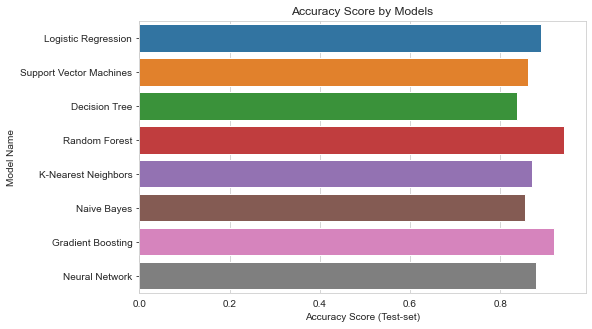

In [50]:
# Defina model Accuracy score & model Name
model_score = [score_lrt, score_svct, score_dtt, score_rft, score_knnt, score_nbt, score_gbt, score_nnt]
model_name  = ['Logistic Regression', 'Support Vector Machines', 'Decision Tree', 'Random Forest', 
              'K-Nearest Neighbors', 'Naive Bayes', 'Gradient Boosting', 'Neural Network']

# Visualize Accuracy score
f, axe = plt.subplots(1, 1,figsize=(8,5))
sns.barplot(x= model_score, y=model_name, ax=axe)
axe.yaxis.tick_left()
axe.set(xlabel='Accuracy Score (Test-set)', ylabel='Model Name', title='Accuracy Score by Models');

# 8. Model Saving

In [51]:
# Model Saving
with open("fake_instagram.pkl", "wb") as model_file:
    pickle.dump(best_grid_rf, model_file)

# 9. Data Inference

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled. Data inference yang akan digunakan adalah sebagai berikut:

In [52]:
data_inf

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,posts,followers,follows,fake
0,0,0.31,1,0.33,0,0,0,0,0,42,175,1
1,1,0.88,1,0.00,0,0,0,1,39,8,60,1
2,1,0.00,2,0.00,0,14,0,0,13,228,346,0
3,0,0.25,1,0.00,0,0,0,1,0,0,11,1
4,0,0.46,1,0.00,0,0,0,1,0,332,1333,1


Data akan displit untuk menentukan data x dan y.

In [53]:
X_inf = data_inf.drop(['fake'], axis=1)
y_inf = data_inf['fake']

In [54]:
# Predict Model Inference

y_pred_inf = best_grid_rf.predict(X_inf)
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['fake_prediction'])

In [55]:
# Concate to Original Inference-Set

pd.concat([data_inf, y_pred_inf], axis=1)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,posts,followers,follows,fake,fake_prediction
0,0,0.31,1,0.33,0,0,0,0,0,42,175,1,1
1,1,0.88,1,0.00,0,0,0,1,39,8,60,1,1
2,1,0.00,2,0.00,0,14,0,0,13,228,346,0,0
3,0,0.25,1,0.00,0,0,0,1,0,0,11,1,1
4,0,0.46,1,0.00,0,0,0,1,0,332,1333,1,1
